# Assessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

In [3]:
df_08.shape

(2404, 18)

In [4]:
s = df_08.duplicated().tolist()
count = 0
for i in s:
    if i == True:
        count += 1
count

25

In [5]:
df_08.shape[0] - df_08.dropna().shape[0]

199

In [6]:
df_18.shape

(1611, 18)

In [7]:
s = df_18.duplicated().tolist()
count = 0
for i in s:
    if i == True:
        count += 1
count

0

In [8]:
df_18.shape[0] - df_18.dropna().shape[0]

2

In [9]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [10]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [11]:
df_08.SmartWay.unique()

array(['no', 'yes'], dtype=object)

In [12]:
df_18.SmartWay.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [13]:
df_08['Sales Area'].unique()

array(['CA', 'FA', 'FC'], dtype=object)

In [14]:
df_18['Cert Region'].unique()

array(['FA', 'CA'], dtype=object)

In [15]:
len(df_08.Trans.unique().tolist())

15

In [16]:
df_08.Trans.unique().tolist()

['Auto-S5',
 'Man-6',
 'Auto-S6',
 'Auto-AV',
 'Auto-S7',
 'Auto-L4',
 'Auto-L6',
 'Auto-4',
 'Man-5',
 'Auto-L5',
 nan,
 'Auto-6',
 'S8',
 'Auto-S4',
 'Auto-L7']

In [17]:
df_08.Cyl, df_18.Cyl

(0       (6 cyl)
 1       (6 cyl)
 2       (4 cyl)
 3       (4 cyl)
 4       (6 cyl)
          ...   
 2399    (6 cyl)
 2400    (8 cyl)
 2401    (6 cyl)
 2402    (6 cyl)
 2403    (8 cyl)
 Name: Cyl, Length: 2404, dtype: object,
 0       6.0
 1       6.0
 2       6.0
 3       6.0
 4       4.0
        ... 
 1606    4.0
 1607    4.0
 1608    4.0
 1609    4.0
 1610    4.0
 Name: Cyl, Length: 1611, dtype: float64)

In [18]:
len(df_08.Cyl.unique()), len(df_18.Cyl.unique())

(9, 8)

In [19]:
"Ethanol/Gas".lower() in df_08.Fuel.str.lower().unique().tolist()

True

In [20]:
"Ethanol/Gas" in df_18.Fuel.str.lower().unique().tolist()

False

In [21]:
df_08.Fuel.unique().tolist()

['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG']

In [22]:
df_18.Fuel.unique().tolist()

['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas', 'Electricity']

### Drop Extraneous Columns

In [23]:
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


### Rename Columns

In [24]:
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [25]:
df_08.rename(columns={"sales_area": "cert_region"}, inplace=True)
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [26]:
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [27]:
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [28]:
(df_08.columns == df_18.columns).all()

True

## Drop Rows with Missing Values

In [29]:
df_08[df_08.columns.tolist()].count()

model                   2404
displ                   2404
cyl                     2205
trans                   2205
drive                   2311
fuel                    2404
cert_region             2404
veh_class               2404
air_pollution_score     2404
city_mpg                2205
hwy_mpg                 2205
cmb_mpg                 2205
greenhouse_gas_score    2205
smartway                2404
dtype: int64

In [30]:
df_18[df_18.columns.tolist()].count()

model                   1611
displ                   1609
cyl                     1609
trans                   1611
drive                   1611
fuel                    1611
cert_region             1611
veh_class               1611
air_pollution_score     1611
city_mpg                1611
hwy_mpg                 1611
cmb_mpg                 1611
greenhouse_gas_score    1611
smartway                1611
dtype: int64

In [31]:
df_08.dropna(axis=0, inplace=True)
df_18.dropna(axis=0, inplace=True)

In [32]:
df_18['cert_region'].unique()

array(['FA', 'CA'], dtype=object)

In [33]:
df_08.isnull().sum().any(), df_18.isnull().sum().any()

(False, False)

## Dedupe Data

In [34]:
df_08.duplicated().any().sum(), df_18.duplicated().any().sum()

(1, 1)

In [35]:
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [36]:
df_08.duplicated().any().sum(), df_18.duplicated().any().sum()

(0, 0)

## Inspect Datatypes

In [37]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2403
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2142 non-null   object 
 1   displ                 2142 non-null   float64
 2   cyl                   2142 non-null   object 
 3   trans                 2142 non-null   object 
 4   drive                 2142 non-null   object 
 5   fuel                  2142 non-null   object 
 6   cert_region           2142 non-null   object 
 7   veh_class             2142 non-null   object 
 8   air_pollution_score   2142 non-null   object 
 9   city_mpg              2142 non-null   object 
 10  hwy_mpg               2142 non-null   object 
 11  cmb_mpg               2142 non-null   object 
 12  greenhouse_gas_score  2142 non-null   object 
 13  smartway              2142 non-null   object 
dtypes: float64(1), object(13)
memory usage: 251.0+ KB


In [38]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1610
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1604 non-null   object 
 1   displ                 1604 non-null   float64
 2   cyl                   1604 non-null   float64
 3   trans                 1604 non-null   object 
 4   drive                 1604 non-null   object 
 5   fuel                  1604 non-null   object 
 6   cert_region           1604 non-null   object 
 7   veh_class             1604 non-null   object 
 8   air_pollution_score   1604 non-null   int64  
 9   city_mpg              1604 non-null   object 
 10  hwy_mpg               1604 non-null   object 
 11  cmb_mpg               1604 non-null   object 
 12  greenhouse_gas_score  1604 non-null   int64  
 13  smartway              1604 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 188.0+ KB


In [39]:
df_08.cyl.unique() # Change cyl by other features to check them all.

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

In [40]:
df_18.cyl.unique()

array([ 6.,  4.,  5., 12., 16.,  8.,  3.])

In [41]:
df_08.cyl.dtype, df_18.cyl.dtype

(dtype('O'), dtype('float64'))

# Fixing `cyl` Data Type

In [42]:
df_08['cyl'] = df_08['cyl'].str.extract("(\d+)")
df_08['cyl'].value_counts()

6     836
4     582
8     516
5     113
12     60
10     29
2       4
16      2
Name: cyl, dtype: int64

In [43]:
df_08['cyl']  = df_08['cyl'].astype(int)
df_08['cyl']

0       6
1       6
2       4
3       4
4       6
       ..
2399    6
2400    8
2401    6
2402    6
2403    8
Name: cyl, Length: 2142, dtype: int32

In [44]:
df_18['cyl'] = df_18['cyl'].astype(int)
df_18['cyl']

0       6
1       6
2       6
3       6
4       4
       ..
1606    4
1607    4
1608    4
1609    4
1610    4
Name: cyl, Length: 1604, dtype: int32

# Fixing `air_pollution_score` Data Type

In [45]:
df_08.cyl.unique()

array([ 6,  4, 12,  8, 10, 16,  5,  2])

In [46]:
df_18.cyl.unique()

array([ 6,  4,  5, 12, 16,  8,  3])

In [47]:
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol/gas,FA,pickup,3/3,9/14,12/19,10/15,4/3,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol/gas,FA,SUV,6/6,9/12,13/18,10/14,4/2,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol/gas,FA,SUV,6/6,9/12,13/17,10/14,4/2,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol/gas,FA,pickup,6/6,9/12,13/17,10/14,4/2,no


In [48]:
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
109,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,FA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
161,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,FA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,VOLVO S90,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,FA,midsize car,7,26/70,33/72,29/71,10,Elite
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small SUV,7,26/60,28/58,26/59,10,Elite
1602,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,FA,small SUV,7,26/60,28/58,26/59,10,Elite
1609,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,standard SUV,7,26/63,30/61,27/62,10,Elite


In [49]:
df1 = hb_08.copy()
df2 = hb_08.copy()

df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol/gas,FA,pickup,3/3,9/14,12/19,10/15,4/3,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol/gas,FA,SUV,6/6,9/12,13/18,10/14,4/2,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol/gas,FA,SUV,6/6,9/12,13/17,10/14,4/2,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol/gas,FA,pickup,6/6,9/12,13/17,10/14,4/2,no


In [50]:
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [51]:
df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,6,11,14,12,6,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,FC,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,ethanol,FA,pickup,3,9,12,10,4,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,ethanol,FA,SUV,6,9,13,10,4,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,ethanol,FA,SUV,6,9,13,10,4,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,ethanol,FA,pickup,6,9,13,10,4,no


In [52]:
df2

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,FC,SUV,7,14,20,16,4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,FC,SUV,7,14,19,16,4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,FC,SUV,6,14,20,16,4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,FC,SUV,6,14,19,16,4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,gas,FC,van,6,12,16,14,2,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,FA,pickup,3,14,19,15,3,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,FA,SUV,6,12,18,14,2,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,FA,SUV,6,12,17,14,2,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,FA,pickup,6,12,17,14,2,no


In [53]:
new_rows = df1.append(df2)
new_rows

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,6,11,14,12,6,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,FC,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,FA,pickup,3,14,19,15,3,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,FA,SUV,6,12,18,14,2,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,FA,SUV,6,12,17,14,2,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,FA,pickup,6,12,17,14,2,no


In [54]:
df_08.drop(hb_08.index, inplace=True)

df_08 = df_08.append(new_rows, ignore_index=True)

In [55]:
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [56]:
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [57]:
df1 = hb_18.copy()
df2 = hb_18.copy()

df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
109,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,FA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
161,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,FA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,VOLVO S90,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,FA,midsize car,7,26/70,33/72,29/71,10,Elite
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small SUV,7,26/60,28/58,26/59,10,Elite
1602,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,FA,small SUV,7,26/60,28/58,26/59,10,Elite
1609,VOLVO XC 90,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,standard SUV,7,26/63,30/61,27/62,10,Elite


In [58]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [59]:
new_rows = df1.append(df2)
df_18.drop(hb_18.index, inplace=True)
df_18 = df_18.append(new_rows, ignore_index=True)

In [60]:
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [61]:
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes

In [62]:
# convert mpg columns to floats
mpg_columns = [x for x in df_08.columns if x.endswith('mpg')]
for c in mpg_columns:
    df_18[c] = df_18[c].astype(float)
    df_08[c] = df_08[c].astype(float)

df_08[mpg_columns[0]].dtype

dtype('float64')

## Fix `greenhouse_gas_score` datatype

In [63]:
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(np.int64)

### Check to confirm all the changes

In [64]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
cert_region             True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

## Exploring Visuals

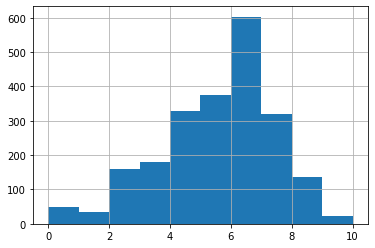

In [65]:
df_08.greenhouse_gas_score.hist()

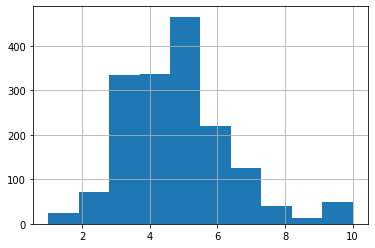

In [66]:
df_18.greenhouse_gas_score.hist()

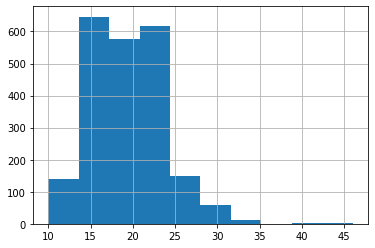

In [67]:
df_08['cmb_mpg'].hist()

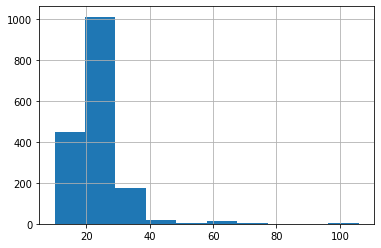

In [68]:
df_18.cmb_mpg.hist()

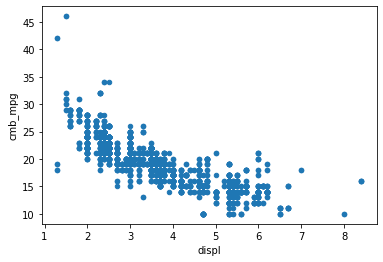

In [69]:
df_08.plot.scatter(x="displ", y='cmb_mpg')

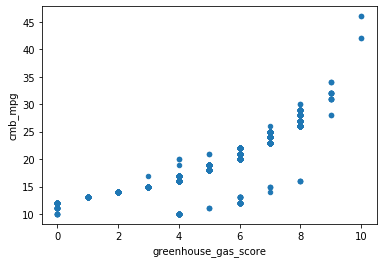

In [70]:
df_08.plot.scatter(x="greenhouse_gas_score", y='cmb_mpg')

## Asking some questions

#### Q1: Are more unique models using alternative sources of fuel? By how much?

In [71]:
df_08.fuel.value_counts()

Gasoline    2067
ethanol       66
gas           65
diesel         7
CNG            2
Name: fuel, dtype: int64

In [72]:
df_18.fuel.value_counts()

Gasoline       1511
Ethanol          55
Gas              55
Diesel           38
Electricity      24
Name: fuel, dtype: int64

In [73]:
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alt_08

33

In [74]:
alt_18 = df_18[(df_18['fuel'] == "Ethanol") | (df_18['fuel'] == "Electricity")]['model'].nunique()
alt_18

28

Text(0, 0.5, 'Number of Unique Models')

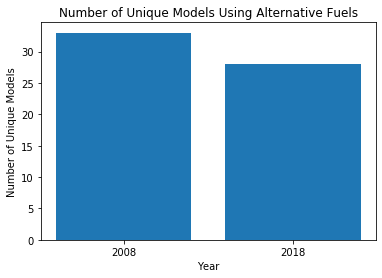

In [75]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")

In [76]:
# total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(411, 366)

In [77]:
prop_08 = alt_08/total_08
prop_18 = alt_18/total_18
prop_08, prop_18

(0.08029197080291971, 0.07650273224043716)

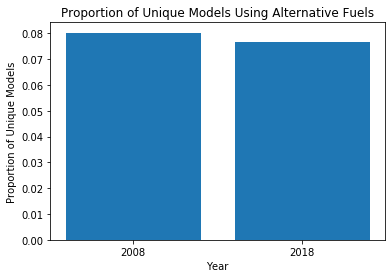

In [78]:
plt.bar(["2008", "2018"], [prop_08, prop_18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

#### Q2: How much have vehicle classes improved in fuel economy?

In [79]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              17.920807
large car        18.323308
midsize car      21.395604
minivan          18.666667
pickup           16.060837
small car        21.054896
station wagon    22.349593
van              14.206897
Name: cmb_mpg, dtype: float64

In [80]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.372881
midsize car        27.849462
minivan            20.800000
pickup             18.589744
small SUV          23.986364
small car          25.388889
special purpose    18.666667
standard SUV       18.197674
station wagon      27.434783
Name: cmb_mpg, dtype: float64

In [81]:
# how much they've increased by for each vehicle class
inc = veh_18 - veh_08
inc

veh_class
SUV                     NaN
large car          5.049573
midsize car        6.453858
minivan            2.133333
pickup             2.528907
small SUV               NaN
small car          4.333993
special purpose         NaN
standard SUV            NaN
station wagon      5.085189
van                     NaN
Name: cmb_mpg, dtype: float64

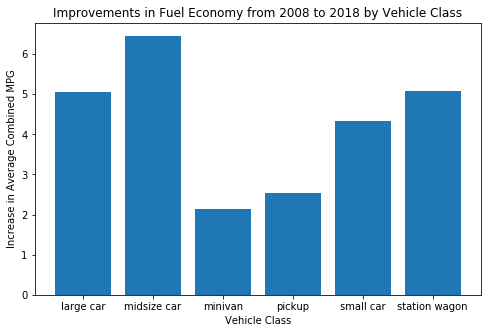

In [82]:
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

#### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [83]:
df_08.smartway.unique(), df_18.smartway.unique()

(array(['no', 'yes'], dtype=object),
 array(['No', 'Yes', 'Elite'], dtype=object))

In [84]:
smart_08 = df_08.query('smartway == "yes"')
smart_18 = df_18.query('smartway in ["Yes", "Elite"]')

In [85]:
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,625.000000,625.000000,625.00000,625.00000,625.000000,625.000000,625.000000
mean,2.492320,4.664000,6.99680,21.45760,28.880000,24.201600,7.027200
std,0.584993,0.934935,1.14459,3.49751,3.091552,3.086519,0.803176
min,1.300000,4.000000,6.00000,17.00000,22.000000,20.000000,6.000000
25%,2.000000,4.000000,6.00000,20.00000,27.000000,22.000000,6.000000
50%,2.400000,4.000000,7.00000,21.00000,29.000000,24.000000,7.000000
75%,2.700000,6.000000,7.00000,23.00000,31.000000,25.000000,7.000000
max,5.000000,8.000000,9.50000,48.00000,45.000000,46.000000,10.000000


In [86]:
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.787963,3.935185,5.194444,34.907407,41.472222,37.361111,7.925926
std,0.407081,0.415360,1.780819,16.393724,13.064746,14.813858,1.194590
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


#### Q4: What features are associated with better fuel economy?

In [87]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2.663931,4.887405,6.557252,20.249046,27.547710,22.921756,6.615458
std,0.674432,1.034604,1.102253,3.172229,3.069027,2.919418,0.810644
min,1.300000,4.000000,1.000000,17.000000,20.000000,20.000000,4.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,6.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [88]:
top_18 = df_18[df_18['cmb_mpg'] > df_18['cmb_mpg'].mean()]
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,2.060131,4.164706,4.683660,26.592157,34.384314,29.504575,6.141176
std,0.483597,0.672231,1.864327,10.437721,8.663051,9.590519,1.384636
min,1.200000,3.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,1.800000,4.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2.000000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2.000000,4.000000,7.000000,27.000000,36.000000,30.000000,7.000000
max,3.600000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


## Merge Datasets

In [89]:
cols = df_08.columns.tolist()

for col in cols:
    df_08.rename(columns={col: col+"_2008"}, inplace=True)

df_08.head(1)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_region_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_gas_score_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no


In [90]:
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')
df_combined.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'cert_region_2008', 'veh_class_2008',
       'air_pollution_score_2008', 'city_mpg_2008', 'hwy_mpg_2008',
       'cmb_mpg_2008', 'greenhouse_gas_score_2008', 'smartway_2008', 'model',
       'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [91]:
df_combined.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_region_2008,veh_class_2008,air_pollution_score_2008,city_mpg_2008,...,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,...,2WD,Gasoline,FA,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,...,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No


In [92]:
df_combined.to_csv('combined_2008_and_2018_datasets.csv', index=False)

In [93]:
model_mpg = df_combined.groupby("model").mean()[['cmb_mpg_2008', 'cmb_mpg']]
model_mpg.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [94]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [95]:
maximum_change = model_mpg['mpg_change'].max()
maximum_change

16.53333333333334

In [96]:
model_mpg[model_mpg['mpg_change'] == maximum_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


In [97]:
idx = model_mpg.mpg_change.idxmax()
idx

'VOLVO XC 90'

In [98]:
model_mpg.loc[idx]

cmb_mpg_2008    15.666667
cmb_mpg         32.200000
mpg_change      16.533333
Name: VOLVO XC 90, dtype: float64